Isostasy Jupyter Notebook. (2020, August 20). Retrieved April 21, 2021, from https://geo.libretexts.org/@go/page/11678

# Interaktives Beispiel: Isostasieprinzip Eisberg in Wasser

Dieses Jupyter Notebook berechnet die Eindringtiefe eines Eisbergs variierender Mächtigkeit in Wasser. 
In der ersten Zelle werden die Dichten des Eises und des Wassers definiert. 

- Führen Sie die Zelle aus, indem sie die Zelle anklicken und dann **strg+enter** drücken, oder den Run-Button in der Menüleiste oben.
- Führen Sie anschließend die zweite Zelle aus. Es erscheint am unteren Ende der Zelle eine Eingabezeile. Tragen Sie dort einen Wert zwischen 1 m und 100 m für die Mächtigkeit des Eisberges ein.
- Sie können fortfahren und weitere Werte in das Eingabefeld eingeben.

**Beantworten Sie folgende Fragen:**
- Ist der Anteil vom Eisberg, der aus dem Wasser heraus ragt größer oder kleiner als der Anteil, der in das Wasser eindringt?
- Wie verändert sich das Verhältnis zwischen Eindringtiefe (depth) und dem Anteil oberhalb des Wasserspiegels (height) für sich ändernde Mächtigkeiten (10m, 60m, 100m)?
- Die Kombination welcher Parameter bestimmt dieses Verhältnis?




In [1]:
import numpy as np
import matplotlib.pyplot as plt
rho_w = 1028 #kg/m^3
rho_i = 917 #kg/m^3
print('Done, Move on to the next cell.')

Done, Move on to the next cell.


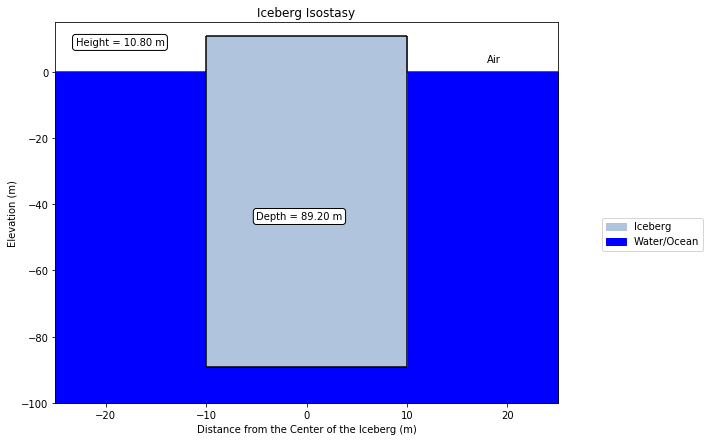

Enter a Iceberg Thickness between 1 and 100 m: 
50
Now Plotting: 50.0 m
Enter a number outside of the provided range to exit the simulation when ready.
Enter an Iceberg Thickness between 1 and 100 m to continue: 
20
Now Plotting: 20.0 m
Enter a number outside of the provided range to exit the simulation when ready.
Enter an Iceberg Thickness between 1 and 100 m to continue: 
99
Now Plotting: 99.0 m
Enter a number outside of the provided range to exit the simulation when ready.
Enter an Iceberg Thickness between 1 and 100 m to continue: 
10 
Now Plotting: 10.0 m
Enter a number outside of the provided range to exit the simulation when ready.
Enter an Iceberg Thickness between 1 and 100 m to continue: 
60
Now Plotting: 60.0 m
Enter a number outside of the provided range to exit the simulation when ready.
Enter an Iceberg Thickness between 1 and 100 m to continue: 
100
Now Plotting: 100.0 m
Enter a number outside of the provided range to exit the simulation when ready.
Enter an Iceberg Thi

In [2]:
def iceberg_isos(rho_w,rho_i,T):
    depth = (rho_i / rho_w) * T
    height = T - depth
    return -depth, height

handle = display(None, display_id=True)
x = np.arange(-25,25) # Horizontal distance in the Graph

bbox = dict(boxstyle ="round", fc = '1') 
fig, ax = plt.subplots(figsize = (9,7))
ax.hlines(0,-25,-10,color='blue')
ax.hlines(0,10,25,color='blue')
ax.fill_betweenx((0,-100),-25,-10,color = 'blue')
ax.fill_betweenx((0,-100),10,25,color = 'blue')
ax.set_xlim(-25,25)
ax.set_title('Iceberg Isostasy')
ax.set_ylabel('Elevation (m)')
ax.set_xlabel('Distance from the Center of the Iceberg (m)')
ax.set_ylim(-100,15)
ax.annotate('Air',(18,3))
print('Enter a Iceberg Thickness between 1 and 100 m: ')
T = float(input())
while T< 1 or T > 100:
    print('Invalid Thickness, please enter a number between 1 and 100 km')
    T = float(input())
while T >= 1 and T <= 100:
    print('Now Plotting:', T, 'm')
    depth, height = iceberg_isos(rho_w,rho_i,T)
    iceberg_bottom = ax.hlines(depth,-10,10,color = 'black')
    iceberg_top = ax.hlines(height,-10,10,color = 'black')
    iceberg_left = ax.vlines(-10,depth,height,color='black')
    iceberg_right = ax.vlines(10,depth,height,color='black')
    iceberg_fill = ax.fill_betweenx((depth,height),-10,10,color='lightsteelblue',label = 'Iceberg')
    below_iceberg = ax.fill_betweenx((-100,depth),-10,10,color='blue',label = 'Water/Ocean')
    depth_label = ax.annotate('Depth = '+'{:.2f}'.format(-depth)+' m',(-5,depth/2),bbox=bbox)
    height_label = ax.annotate('Height = '+'{:.2f}'.format(height)+' m',(-23,8),bbox=bbox)
    ax.legend(bbox_to_anchor=(1.3, 0.5))
    handle.update(fig)
    iceberg_bottom.remove()
    iceberg_top.remove()
    iceberg_left.remove()
    iceberg_right.remove()
    iceberg_fill.remove()
    below_iceberg.remove()
    depth_label.remove()
    height_label.remove()
    print('Enter a number outside of the provided range to exit the simulation when ready.')
    print('Enter an Iceberg Thickness between 1 and 100 m to continue: ')
    T = float(input())
plt.close()
#print('The Simulation is Complete, Consider the Key Questions')